# Task-1 Graduate Rotational Internship Program (GRIP - APR 22) organised by The Sparks Foundation.

#### Author: Rashmi S (Intern APR 2022)

## Aim - 
* To perform simple linear regression using supervised ML
* To predict the score if a student studies for 9.25 hrs / day

# Step 1: Importing Libraries

In [65]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Step 2: Reading the dataset

In [9]:
data=pd.read_csv("http://bit.ly/w-data")
data.head(10)

Button(description='Toggle Pandas/Lux', layout=Layout(top='5px', width='140px'), style=ButtonStyle())

Output()

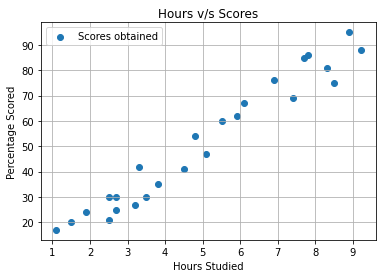

In [17]:
plt.scatter(data['Hours'],data['Scores'], label="Scores obtained")
plt.title("Hours v/s Scores")
plt.xlabel("Hours Studied")
plt.ylabel("Percentage Scored")
plt.grid()
plt.legend()
plt.show()

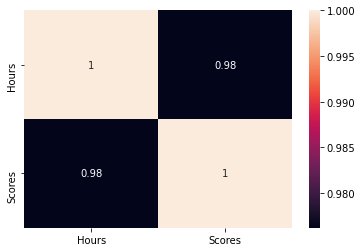

In [15]:
ax = sns.heatmap(data.corr(), annot=True)

## Step 3: Data Preprocessing 

In [9]:
# to check the missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
data.shape

(25, 2)

# Step 4: Setting up of Dependent and Independent Variables

In [19]:
x= data['Hours']
y= data["Scores"]
# reshaping of the data
x=x.values.reshape(len(x),1)
y=y.values.reshape(len(y),1)


# Step 5: Building Model

In [34]:
# splitting the data into train and test 

x_train, x_test, y_train, y_test =train_test_split(x,y,test_size=0.1,random_state=0)  # 80/20 rule ,train set will take 80% data and test set will take 20% of the data 


In [35]:
x_train.shape, y_train.shape

((22, 1), (22, 1))

In [36]:
x_test.shape, y_test.shape

((3, 1), (3, 1))

In [37]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [60]:
model.coef_

array([[9.85475541]])

In [61]:
model.intercept_

array([2.52007671])

In [38]:
y_predicted_test=model.predict(x_test)
y_predicted_train = model.predict(x_train)
print(pd.DataFrame(y_predicted_test))

           0
0  17.302210
1  34.055294
2  75.445267


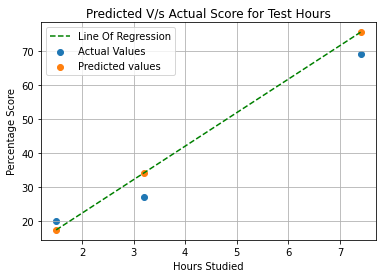

In [41]:
#Predicted V/s Actual Score for Test Hours

plt.scatter(x_test,y_test,label = 'Actual Values')
plt.scatter(x_test,y_predicted_test,label= 'Predicted values')
plt.plot(x_test,y_predicted_test,'--g',label='Line Of Regression')

plt.title('Predicted V/s Actual Score for Test Hours')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

plt.legend()
plt.grid()
plt.show()

In [ ]:
# Error is very high, hence to increase accuracy we have to optimize our graph

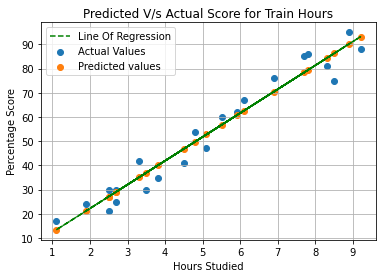

In [43]:
plt.scatter(x_train,y_train,label = 'Actual Values')
plt.scatter(x_train,y_predicted_train,label= 'Predicted values')
plt.plot(x_train,y_predicted_train,'--g',label='Line Of Regression')

plt.title('Predicted V/s Actual Score for Train Hours')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')

plt.legend()
plt.grid()
plt.show()

In [71]:
print("Mean Squared Error:",
      mean_squared_error(y_test, y_predicted_test,squared=False))


Mean Squared Error: 5.732850045774972


In [44]:
accuracy= model.score(x_test, y_test)
print("Accuracy of the model was found to be :", accuracy)

Accuracy of the model was found to be : 0.9298077534821835


# Step 6: Optimizing the accuracy

In [ ]:
# to change random seed and check accuracy

In [49]:
acc_list=[]
for i in range(10000):
    xtrain_new,xtest_new,ytrain_new,ytest_new = train_test_split(x,y,train_size=0.9,random_state=i)
    model1 = LinearRegression()
    model1.fit(xtrain_new,ytrain_new)
    new_accuracy = model1.score(xtest_new,ytest_new)
    acc_list.append(new_accuracy)
        
acc_list

[0.9298077534821835,
 0.6041054928963656,
 -1.4225903447212924,
 0.9327813663954249,
 0.8405585799004379,
 0.9025194047306003,
 0.9459052529599732,
 0.9544952944382422,
 0.9381449038927532,
 -0.5330400581613686,
 0.7553317386299322,
 0.46750459617597695,
 -0.6367753292949814,
 0.8999033015656035,
 0.8453088467919847,
 -1.6350288730151186,
 0.7400383032083478,
 0.945443925400551,
 0.9729956983026026,
 -0.1564808132447597,
 0.8493620117021918,
 0.6847148833734545,
 0.69012001823611,
 0.9801342719762446,
 0.9702820274629472,
 -16.011152727976768,
 0.9514975041111625,
 0.9400898178018178,
 0.951498364099847,
 0.9368443486474068,
 0.938875663630763,
 0.9689202135778109,
 0.3228704113881189,
 0.9528473689506218,
 0.9528473689506218,
 0.8976193140151,
 -0.2555184107568076,
 0.9764246161290429,
 0.9216866523682254,
 0.9559818106352874,
 0.9609220899987835,
 0.9497259731613219,
 0.974047128713709,
 0.9713875893742198,
 0.9068477270479203,
 0.08015258045624807,
 0.8369747552485849,
 0.9668067680

In [50]:
np.max(acc_list)

0.9902495698647099

In [52]:
print("The maximum accuracy is obtained with the seed value of :", np.argmax(acc_list))

The maximum accuracy is obtained with the seed value of : 6164


# Again training the model with random seed as 6164

In [75]:
x_train_new, x_test_new, y_train_new, y_test_new = train_test_split(x,y, train_size=0.9, random_state=6164)
model1 = LinearRegression()
model1.fit(x_train_new, y_train_new)
print("The accuracy after opitmization was found to be :", model1.score( x_test_new, y_test_new))

The accuracy after opitmization was found to be : 0.9902495698647099


In [77]:
y_pred_new=model1.predict(x_test_new)
print("Mean Squared Error:",
      mean_squared_error(y_test_new, y_pred_new,squared=False))


Mean Squared Error: 2.078065727739954


# Hence, 99.02% accuracy has been obtained after optimization

# 

## Question - Predicted score if student studies 9.25 hrs/day ?

In [55]:
import joblib

In [56]:
joblib.dump(model1,"Marks_Predictor.pkl")

['Marks_Predictor.pkl']

In [58]:
my_model = joblib.load('Marks_Predictor.pkl')

In [59]:
predicted_marks = my_model.predict([[9.25]])[0]
print("Hence for 9.25 hours of study marks obtained will be:",predicted_marks)

Hence for 9.25 hours of study marks obtained will be: [93.19838345]


# Predicted Score - 93.198